# K-Means Clustering

### Data preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]

In [2]:
# Importing the Mall dataset with pandas
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [3]:
X[0:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

### Using the elbow method to find the optimal number of clusters

In [4]:
wcss = [] #Within Cluster Sum of Square

In [5]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, 
                    init = 'k-means++', 
                    max_iter = 300,
                    n_init = 10, 
                    random_state = 42) # Here by default init = 'k-means++', max_iter = 300, n_init = 10.
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # kmeans.inertia_ gives Sum of squared distances of samples to their closest cluster center.

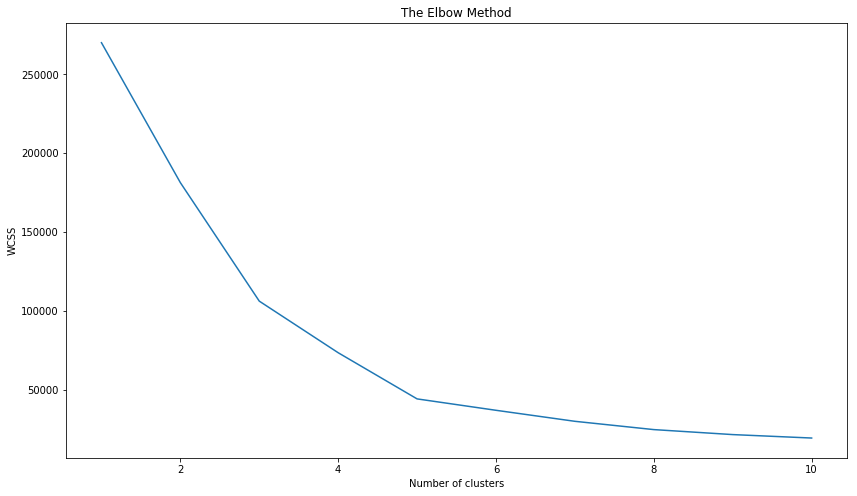

In [6]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

***

**From the Elbow method we can see that the optimal cluster number is 5 for the given dataset**

***

### Applying K-Means to the Mall dataset

In [7]:
kmeans = KMeans(n_clusters = 5, 
                init = 'k-means++', 
                max_iter = 300, 
                n_init = 10, 
                random_state = 42)
y_kmeans = kmeans.fit_predict(X)

### Visualizing the clusters

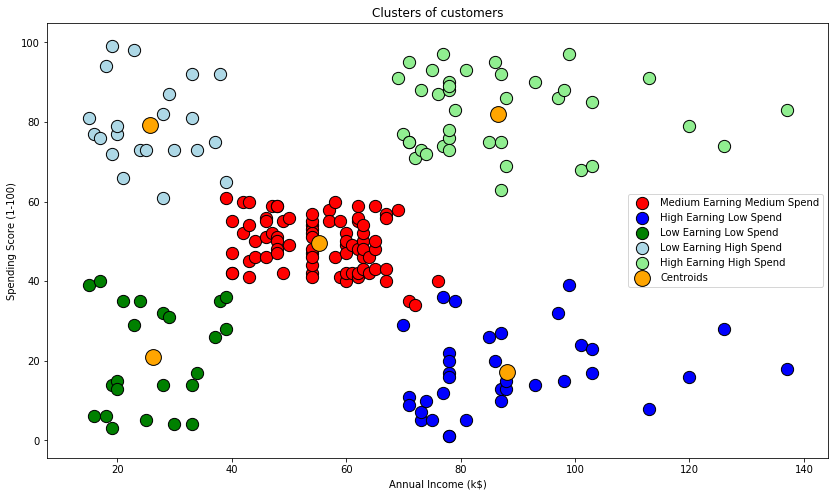

In [8]:
plt.scatter(X[y_kmeans == 0, 0], 
            X[y_kmeans == 0, 1], 
            s = 150, 
            c = 'red', 
            label = 'Medium Earning Medium Spend', 
            edgecolors = 'black')
plt.scatter(X[y_kmeans == 1, 0], 
            X[y_kmeans == 1, 1], 
            s = 150, 
            c = 'blue', 
            label = 'High Earning Low Spend', 
            edgecolors = 'black')
plt.scatter(X[y_kmeans == 2, 0], 
            X[y_kmeans == 2, 1], 
            s = 150, 
            c = 'green', 
            label = 'Low Earning Low Spend', 
            edgecolors = 'black')
plt.scatter(X[y_kmeans == 3, 0], 
            X[y_kmeans == 3, 1], 
            s = 150, 
            c = 'lightblue', 
            label = 'Low Earning High Spend', 
            edgecolors = 'black')
plt.scatter(X[y_kmeans == 4, 0], 
            X[y_kmeans == 4, 1], 
            s = 150, 
            c = 'lightgreen', 
            label = 'High Earning High Spend', 
            edgecolors = 'black')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s = 250,
            c = 'orange',
            label = 'Centroids', 
            edgecolors = 'black')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

***

**The target customers should be the one with High Earning and High Spend.**

***